In [1]:
import sys 
sys.path.append("../")
import pandas as pd

#import backtester as bt
import backtester as bt

from abc import ABC, abstractmethod
import QuantLib as ql 
from datetime import date, datetime 
import matplotlib.pyplot as plt
import numpy as np

# Positions

In [21]:
rebuild = False 


market = bt.MarketData()
market.load_market_data(rebuild)

In [40]:
entry_mkt = market.market_data['2015-01-02']
exit_mkt = market.market_data['2023-12-27']

eq_position = bt.EquityPosition(symbol='ISP_IM_Equity', quantity=10, market_data=entry_mkt, position_type=bt.PositionType.LONG)

prezzo e ctv iniziale

In [41]:
eq_position.entry_price

2.454

In [30]:
eq_position.initial_ctv

24.540000000000003

calcolo del pnl

In [42]:
eq_position.calculate_pnl(exit_mkt)

2.024999999999997

In [44]:
eq_position.closed_pnl

0

chiudere la posizione:
- da qua in poi il floating pnl è 0
- il pnl chiuso viene salvato in closed_pnl

In [46]:
eq_position.close_position(exit_mkt)

In [47]:
eq_position.calculate_pnl(exit_mkt)

0

In [48]:
eq_position.closed_pnl

2.024999999999997

# 1) BuyHold

In [ ]:
class BuyHoldStrategy(bt.Backtester):
    def __init__(self, universe, start_date, end_date, starting_balance):
        super().__init__(universe, start_date, end_date, starting_balance)
        self.position_open = False   
        self.price_tickers = ['ISP_IM_Equity']


    def on_data(self):
        mkt = self.history[self.ref_date]

        if not self.position_open:
            position = bt.EquityPosition(symbol='ISP_IM_Equity', quantity=1, market_data=mkt, position_type=bt.PositionType.LONG)
            self.portfolio.add_position(position)
            self.position_open = True

        if self.ref_date == "2023-12-27":
            eq_position = self.portfolio.get_positions('ISP_IM_Equity', bt.AssetType.EQUITY)[0]
            eq_position.close_position(mkt)


class BenchmarkStrategy(bt.Backtester):
    def __init__(self, universe, start_date, end_date, starting_balance):
        super().__init__(universe, start_date, end_date, starting_balance)
        self.position_open = False   
        self.price_tickers = ['ISP_IM_Equity']

    def on_data(self):
        mkt = self.history[self.ref_date]

        if not self.position_open:
            position = bt.EquityPosition(symbol='ISP_IM_Equity', quantity=1, market_data=mkt, position_type=bt.PositionType.LONG)
            self.portfolio.add_position(position)
            self.position_open = True



In [112]:
universe = ['ISP_IM_Equity']
start_date = '2022-01-01'
end_date ='2024-12-31'
starting_balance=1000

In [114]:
backtester = BuyHoldStrategy(universe, start_date, end_date, starting_balance)
backtester.backtest()

benchmark = BenchmarkStrategy(universe, start_date, end_date, starting_balance)
benchmark.backtest()

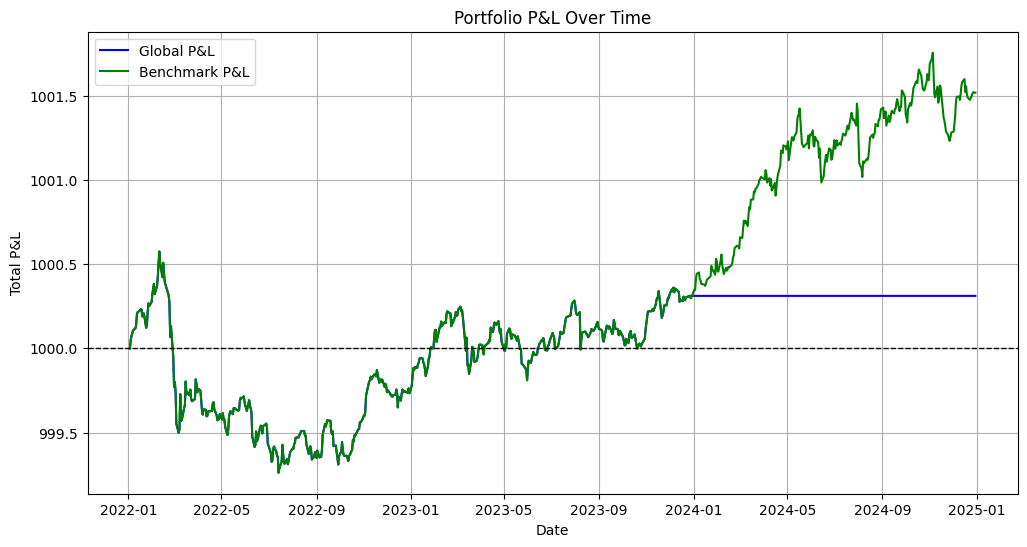

In [115]:
res = bt.ResultAnalyzer(backtester.positions_summary, backtester.period_pnl)
res_benchmark = bt.ResultAnalyzer(benchmark.positions_summary, benchmark.period_pnl)

res.plot_pnl(benchmark=res_benchmark)